"The foundation of this project is a comprehensive dataset originally compiled by the Korea Sports Promotion Foundation. This publicly available dataset contains a wealth of information on various body performance metrics, including [mention a few features].

We sourced this data from an open online repository. However, it's important to note that the raw data required significant preprocessing and filtering on our part. We specifically focused on [explain your processing steps] to ensure the data was clean, relevant, and suitable for our multi-class classification task. This preparation was crucial for achieving the insights and model performance we'll be discussing."

In [97]:
import pandas as pd
import numpy as np

In [98]:
df = pd.read_csv(r"B:\projectML\Body Performance\Body_Performance.csv")

In [99]:
df

,Unnamed: 0,Age,Gender,Height_CM,Weight_KG,Body_Fat,Diastolic,Systolic,Grip_Force,Sit_and_BendForward_CM,Sit_Up_Counts,Broad_Jump_CM,Performance
0,0,27,M,172.3,75.24,21.3,80,130,54.9,18.4,60,217,Average
1,1,25,M,165.0,55.80,15.7,77,126,36.4,16.3,53,229,Strong
2,2,31,M,179.6,78.00,20.1,92,152,44.8,12.0,49,181,Average
3,3,32,M,174.5,71.10,18.4,76,147,41.4,15.2,53,219,Good
4,4,28,M,173.8,67.70,17.1,70,127,43.5,27.1,45,217,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13387,13388,25,M,172.1,71.80,16.2,74,141,35.8,17.4,47,198,Average
13388,13389,21,M,179.7,63.90,12.1,74,128,33.0,1.1,48,167,Weak
13389,13390,39,M,177.2,80.50,20.1,78,132,63.5,16.4,45,229,Strong
13390,13391,64,F,146.1,57.70,40.4,68,121,19.3,9.2,0,75,Weak


In [100]:
df.drop("Unnamed: 0",axis = 1,inplace = True)

In [101]:
df

,Age,Gender,Height_CM,Weight_KG,Body_Fat,Diastolic,Systolic,Grip_Force,Sit_and_BendForward_CM,Sit_Up_Counts,Broad_Jump_CM,Performance
0,27,M,172.3,75.24,21.3,80,130,54.9,18.4,60,217,Average
1,25,M,165.0,55.80,15.7,77,126,36.4,16.3,53,229,Strong
2,31,M,179.6,78.00,20.1,92,152,44.8,12.0,49,181,Average
3,32,M,174.5,71.10,18.4,76,147,41.4,15.2,53,219,Good
4,28,M,173.8,67.70,17.1,70,127,43.5,27.1,45,217,Good
...,...,...,...,...,...,...,...,...,...,...,...,...
13387,25,M,172.1,71.80,16.2,74,141,35.8,17.4,47,198,Average
13388,21,M,179.7,63.90,12.1,74,128,33.0,1.1,48,167,Weak
13389,39,M,177.2,80.50,20.1,78,132,63.5,16.4,45,229,Strong
13390,64,F,146.1,57.70,40.4,68,121,19.3,9.2,0,75,Weak


Age - Age of the individual.

Gender - Gender of the individual (M or F).

Height_CM - Height in centimeters.

Weight_KG - Weight in kilograms.

Body_Fat - Body fat percentage.

Diastolic - Diastolic blood pressure.(Diastolic blood pressure is the lower number in a blood pressure reading,)

Systolic - Systolic blood pressure.(Systolic blood pressure is the top number in a blood pressure reading)

Grip_Force - Grip strength force.*Grip force, or grip strength, is a measure of how strong your hand is)

Sit_and_BendForward_CM - Flexibility measurement.

Sit_Up_Counts - Number of sit-ups performed.

Broad_Jump_CM - Distance of broad jump in centimeters.(A broad jump, also called a standing long jump)

Performance - Performance category (Weak, Average, Good, Strong).

In [102]:
numeric_data = df.select_dtypes(exclude='object')
categorical_data = df.select_dtypes(include='object')

In [103]:
numeric_data.mean()

Age                        36.775836
Height_CM                 168.560671
Weight_KG                  67.448686
Body_Fat                   23.239608
Diastolic                  78.797416
Systolic                  130.238053
Grip_Force                 36.964569
Sit_and_BendForward_CM     15.208933
Sit_Up_Counts              39.770311
Broad_Jump_CM             190.131347
dtype: float64

In [104]:
df.mode()

,Age,Gender,Height_CM,Weight_KG,Body_Fat,Diastolic,Systolic,Grip_Force,Sit_and_BendForward_CM,Sit_Up_Counts,Broad_Jump_CM,Performance
0,21.0,M,170.0,70.5,23.1,80.0,120.0,43.1,20.0,45.0,211.0,Average
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Weak


## Inter Quartile Range(IQR)

In [105]:
for col in numeric_data.columns:
    Q1 = df[col].quantile(.25)
    Q3 = df[col].quantile(.75)
    IQR = Q3 - Q1
    print('IQR of %s : %d' %(col,IQR))

IQR of Age : 23
IQR of Height_CM : 12
IQR of Weight_KG : 17
IQR of Body_Fat : 10
IQR of Diastolic : 15
IQR of Systolic : 21
IQR of Grip_Force : 17
IQR of Sit_and_BendForward_CM : 9
IQR of Sit_Up_Counts : 20
IQR of Broad_Jump_CM : 59


## Range

In [106]:
numeric_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13392 entries, 0 to 13391
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     13392 non-null  int64  
 1   Height_CM               13392 non-null  float64
 2   Weight_KG               13392 non-null  float64
 3   Body_Fat                13392 non-null  float64
 4   Diastolic               13392 non-null  int64  
 5   Systolic                13392 non-null  int64  
 6   Grip_Force              13392 non-null  float64
 7   Sit_and_BendForward_CM  13392 non-null  float64
 8   Sit_Up_Counts           13392 non-null  int64  
 9   Broad_Jump_CM           13392 non-null  int64  
dtypes: float64(5), int64(5)
memory usage: 1.0 MB


In [107]:
for col in numeric_data.columns:
    range = df[col].max() - df[col].min()
    print('range of %s : %d'%(col,range))

range of Age : 43
range of Height_CM : 68
range of Weight_KG : 111
range of Body_Fat : 75
range of Diastolic : 156
range of Systolic : 201
range of Grip_Force : 70
range of Sit_and_BendForward_CM : 238
range of Sit_Up_Counts : 80
range of Broad_Jump_CM : 303


## Confiedence Interval:

<Axes: xlabel='Weight_KG', ylabel='Height_CM'>

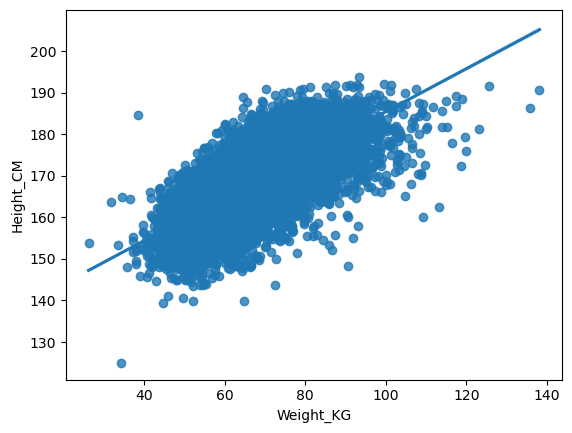

In [108]:
import seaborn as sns
sns.regplot(data = df, x="Weight_KG", y="Height_CM", ci=95)

In [109]:
#Method to calculate C.I
import numpy as np
import scipy.stats


def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m, m-h, m+h

In [110]:
mean_confidence_interval(df['Age'], confidence=0.95)

(36.77583632019116, 36.54503972923539, 37.00663291114693)

## Z-Score

In [111]:
import scipy.stats as stats
z_scores = stats.zscore(numeric_data)
z_scores

,Age,Height_CM,Weight_KG,Body_Fat,Diastolic,Systolic,Grip_Force,Sit_and_BendForward_CM,Sit_Up_Counts,Broad_Jump_CM
0,-0.717473,0.443785,0.652068,-0.267290,0.111955,-0.016184,1.688110,0.377347,1.416990,0.673949
1,-0.864258,-0.422582,-0.974898,-1.039006,-0.167331,-0.288119,-0.053138,0.129020,0.926674,0.974946
2,-0.423903,1.310152,0.883058,-0.432658,1.229097,1.479460,0.737483,-0.379460,0.646494,-0.229042
3,-0.350510,0.704882,0.305585,-0.666929,-0.260426,1.139541,0.417470,-0.001056,0.926674,0.724115
4,-0.644080,0.621806,0.021033,-0.846077,-0.818997,-0.220135,0.615125,1.406131,0.366314,0.673949
...,...,...,...,...,...,...,...,...,...,...
13387,-0.864258,0.420049,0.364169,-0.970103,-0.446617,0.731638,-0.109611,0.259096,0.506404,0.197370
13388,-1.157827,1.322020,-0.296996,-1.535109,-0.446617,-0.152151,-0.373151,-1.668395,0.576449,-0.580206
13389,0.163237,1.025319,1.092287,-0.432658,-0.074236,0.119784,2.497555,0.140845,0.366314,0.974946
13390,1.998048,-2.665642,-0.815884,2.364812,-1.005188,-0.628038,-1.662616,-0.710562,-2.785714,-2.887850


## P_Value

In [112]:
p_values_1 = scipy.stats.norm.sf(abs(-0.717))#left-tailed

p_values_2 = scipy.stats.norm.sf(abs(z_scores)) #right-tailed

p_values_3 = scipy.stats.norm.sf(abs(z_scores))*2 #two-tailed

p_values_1, p_values_2, p_values_3

(0.23668704832971305,
 array([[0.23654124, 0.32859896, 0.25717852, ..., 0.35295792, 0.07824293,
         0.25017188],
        [0.1937232 , 0.33630019, 0.16480532, ..., 0.448671  , 0.17704779,
         0.1647935 ],
        [0.33581834, 0.09507218, 0.18860259, ..., 0.35217332, 0.25897967,
         0.40941796],
        ...,
        [0.43516598, 0.15260631, 0.13735352, ..., 0.44399625, 0.35706541,
         0.1647935 ],
        [0.02285571, 0.00384208, 0.20728318, ..., 0.23867774, 0.0026705 ,
         0.00193942],
        [0.41928402, 0.29416342, 0.4550653 , ..., 0.16880722, 0.21576261,
         0.39969929]]),
 array([[0.47308248, 0.65719792, 0.51435703, ..., 0.70591584, 0.15648587,
         0.50034376],
        [0.38744639, 0.67260038, 0.32961063, ..., 0.897342  , 0.35409557,
         0.32958699],
        [0.67163667, 0.19014437, 0.37720518, ..., 0.70434665, 0.51795935,
         0.81883593],
        ...,
        [0.87033196, 0.30521262, 0.27470705, ..., 0.88799249, 0.71413083,
         0.3

In [113]:
#Example to understand easily:
scipy.stats.norm.sf(abs(0.65))

0.2578461108058647

## T_Test

In [114]:
!pip install researchpy

In [115]:
import researchpy as rp
rp.ttest(group1= df['Body_Fat'][df['Gender'] == 'M'], group1_name= "Male",
         group2= df['Body_Fat'][df['Gender'] == 'F'], group2_name= "Female")

(   Variable        N       Mean        SD        SE  95% Conf.   Interval
 0      Male   8467.0  20.188151  5.952703  0.064692  20.061339  20.314963
 1    Female   4925.0  28.485636  6.225219  0.088706  28.311733  28.659538
 2  combined  13392.0  23.239608  7.256829  0.062708  23.116691  23.362525,
               Independent t-test     results
 0  Difference (Male - Female) =      -8.2975
 1          Degrees of freedom =   13390.0000
 2                           t =     -76.4759
 3       Two side test p value =       0.0000
 4      Difference < 0 p value =       0.0000
 5      Difference > 0 p value =       1.0000
 6                   Cohen's d =      -1.3705
 7                   Hedge's g =      -1.3704
 8              Glass's delta1 =      -1.3939
 9            Point-Biserial r =      -0.5514)

In [116]:
# Independent T-test using Scipy.stats
stats.ttest_ind(df['Body_Fat'][df['Gender'] == 'M'],
                df['Body_Fat'][df['Gender'] == 'F'])

Ttest_indResult(statistic=-76.47589750264021, pvalue=0.0)

## Anova Test

In [117]:
# One way anova
from scipy.stats import f_oneway
class1 = df['Weight_KG']
class2 = df['Body_Fat']
class3 = df['Sit_Up_Counts'] 
print(f_oneway(class1, class2, class3))

F_onewayResult(statistic=50207.080228084036, pvalue=0.0)


<Axes: >

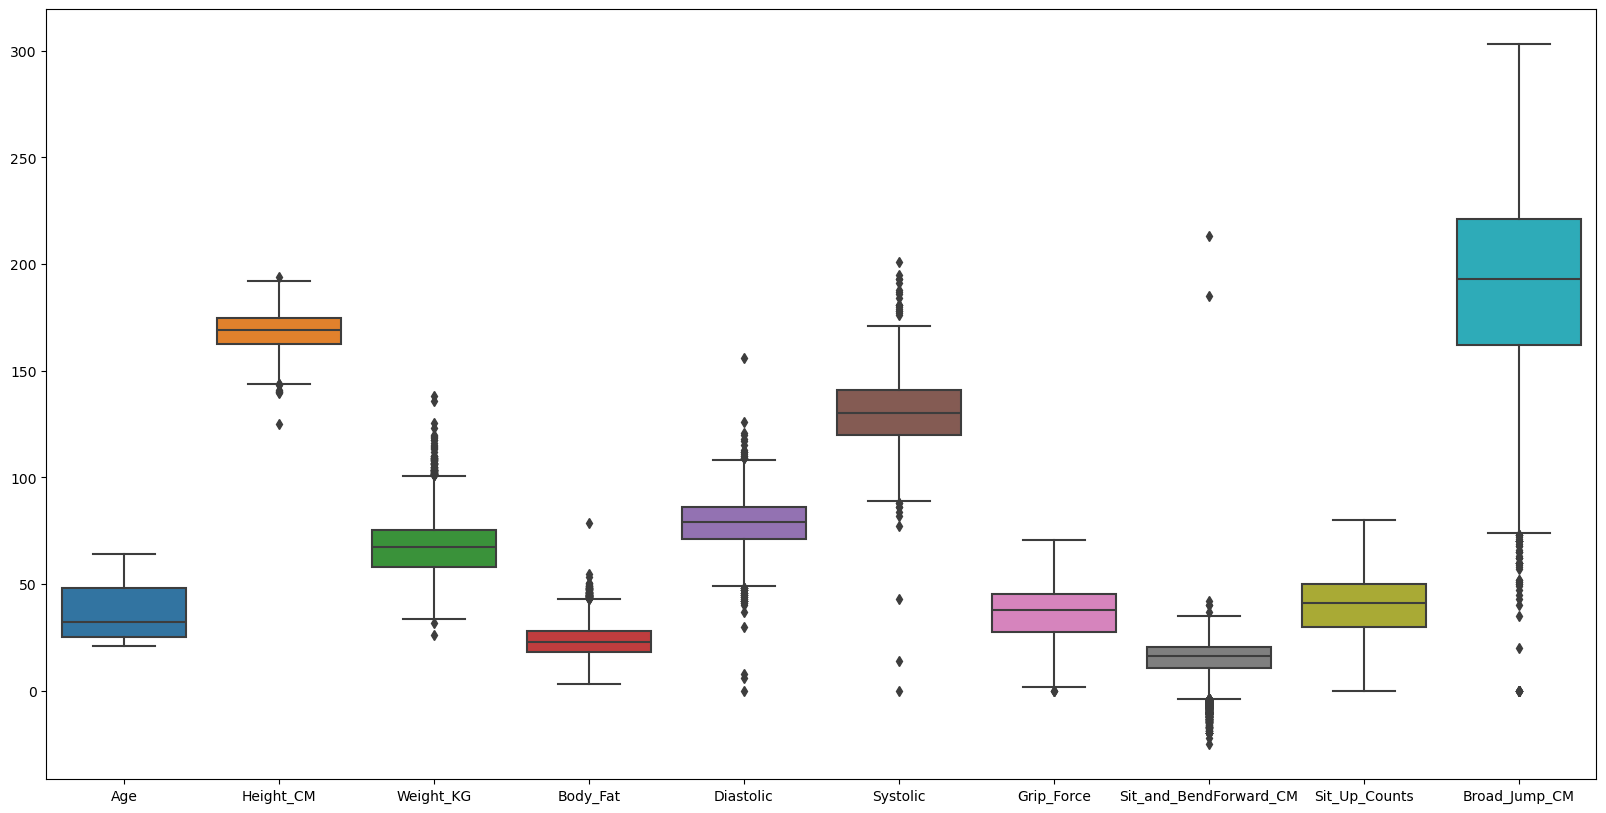

In [118]:
#Boxlot can plot outliers in data
import matplotlib.pyplot as plt
plt.figure(figsize = (20, 10))
sns.boxplot(data = df)

## Removing Outliers using IQR

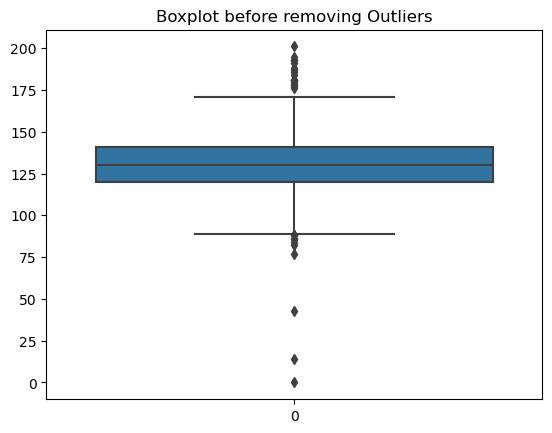

In [ ]:
#Take an example by removing outliers in 'systolic' column:
sns.boxplot(df['Systolic'])
plt.title('Boxplot before removing Outliers')
plt.show()

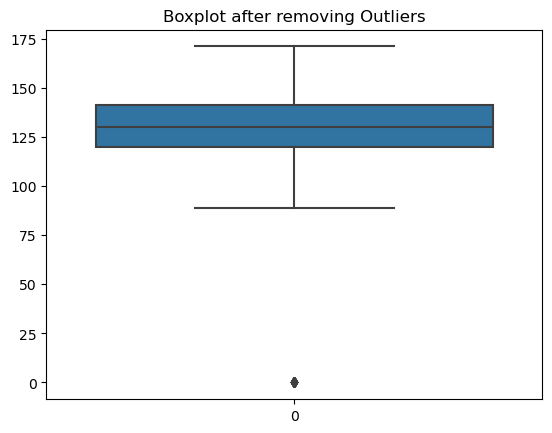

In [120]:
#removing Outliers
for i in df['Systolic']:
    q1 = df['Systolic'].quantile(0.25)
    q3 = df['Systolic'].quantile(0.75)
    iqr = q3-q1
    lower_tail = q1 - 1.5*iqr
    upper_tail = q3 + 1.5*iqr
    
    if i>upper_tail or i<lower_tail:
        df['Systolic'] = df['Systolic'].replace(i,0)
        
sns.boxplot(df['Systolic'])
plt.title('Boxplot after removing Outliers')
plt.show()

## Histograms

C:\Users\USER\AppData\Local\Temp\ipykernel_3764\1007613378.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Weight_KG'], hist=True, kde=True,


<Axes: xlabel='Weight_KG', ylabel='Density'>

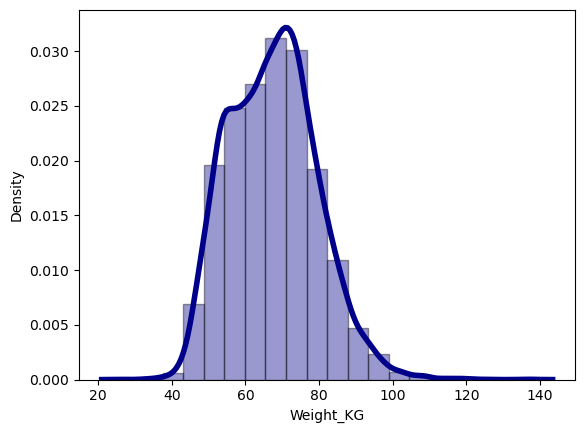

In [121]:
sns.distplot(df['Weight_KG'], hist=True, kde=True, 
             bins=20, color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

In [122]:
df.shape

(13392, 12)

In [123]:
df.describe()

,Age,Height_CM,Weight_KG,Body_Fat,Diastolic,Systolic,Grip_Force,Sit_and_BendForward_CM,Sit_Up_Counts,Broad_Jump_CM
count,13392.000000,13392.000000,13392.000000,13392.000000,13392.000000,13392.000000,13392.000000,13392.000000,13392.000000,13392.000000
mean,36.775836,168.560671,67.448686,23.239608,78.797416,129.941084,36.964569,15.208933,39.770311,190.131347
std,13.625886,8.426305,11.949061,7.256829,10.742092,15.611654,10.624959,8.456904,14.277056,39.868977
min,21.000000,125.000000,26.300000,3.000000,0.000000,0.000000,0.000000,-25.000000,0.000000,0.000000
25%,25.000000,162.400000,58.200000,18.000000,71.000000,120.000000,27.500000,10.900000,30.000000,162.000000
50%,32.000000,169.200000,67.400000,22.800000,79.000000,130.000000,37.900000,16.200000,41.000000,193.000000
75%,48.000000,174.800000,75.300000,28.000000,86.000000,141.000000,45.200000,20.700000,50.000000,221.000000
max,64.000000,193.800000,138.100000,78.400000,156.000000,171.000000,70.500000,213.000000,80.000000,303.000000


In [ ]:
df["Sit_and_BendForward_CM"] = [0 if ai < 0 else i for i in df["Sit_and_BendForward_CM"]]

In [125]:
df.describe()

,Age,Height_CM,Weight_KG,Body_Fat,Diastolic,Systolic,Grip_Force,Sit_and_BendForward_CM,Sit_Up_Counts,Broad_Jump_CM
count,13392.000000,13392.000000,13392.000000,13392.000000,13392.000000,13392.000000,13392.000000,13392.000000,13392.000000,13392.000000
mean,36.775836,168.560671,67.448686,23.239608,78.797416,129.941084,36.964569,15.512699,39.770311,190.131347
std,13.625886,8.426305,11.949061,7.256829,10.742092,15.611654,10.624959,7.689768,14.277056,39.868977
min,21.000000,125.000000,26.300000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25.000000,162.400000,58.200000,18.000000,71.000000,120.000000,27.500000,10.900000,30.000000,162.000000
50%,32.000000,169.200000,67.400000,22.800000,79.000000,130.000000,37.900000,16.200000,41.000000,193.000000
75%,48.000000,174.800000,75.300000,28.000000,86.000000,141.000000,45.200000,20.700000,50.000000,221.000000
max,64.000000,193.800000,138.100000,78.400000,156.000000,171.000000,70.500000,213.000000,80.000000,303.000000


### Identify Missing values

In [126]:
df.isnull().sum()

Age                       0
Gender                    0
Height_CM                 0
Weight_KG                 0
Body_Fat                  0
Diastolic                 0
Systolic                  0
Grip_Force                0
Sit_and_BendForward_CM    0
Sit_Up_Counts             0
Broad_Jump_CM             0
Performance               0
dtype: int64

### Identify Duplicates

In [127]:
df.drop_duplicates(inplace = True)

df.duplicated().sum()

0

## Relationship between weights and performance based on Gender

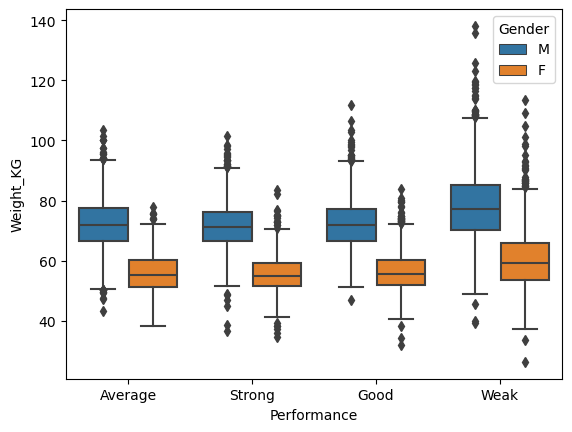

In [128]:
sns.boxplot(y=df["Weight_KG"],x=df["Performance"],hue=df["Gender"])
plt.show()

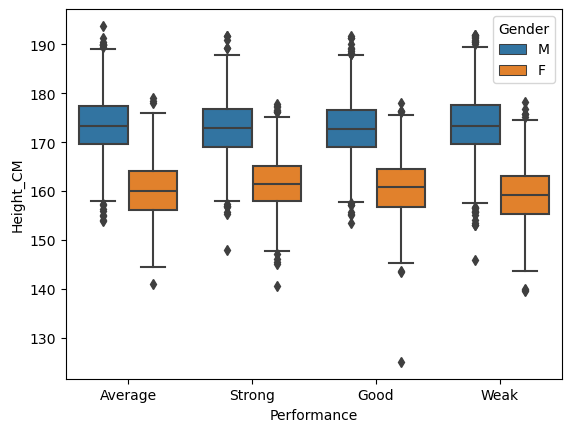

In [129]:
sns.boxplot(y=df["Height_CM"],x=df["Performance"],hue=df["Gender"])
plt.show()

### Age vs Grip Force (Correlation Test)

In [130]:
from scipy.stats import pearsonr

age = df['Age']
grip_force = df['Grip_Force']

# Perform correlation test
corr_coeff, p_value = pearsonr(age, grip_force)
print("Correlation Coefficient:", corr_coeff)
print("P-value:", p_value)

if p_value < 0.05:
    print("Reject Null Hypothesis: Age influences Grip Force.")
else:
    print("Fail to Reject Null Hypothesis: No evidence that Age influences Grip Force.")


Correlation Coefficient: -0.17963804063317532
P-value: 1.614728751425462e-97
Reject Null Hypothesis: Age influences Grip Force.


### Systolic vs Performance (ANOVA Test)

In [131]:
from scipy.stats import f_oneway

weak_systolic = df[df['Performance'] == 'Weak']['Systolic']
average_systolic = df[df['Performance'] == 'Average']['Systolic']
good_systolic = df[df['Performance'] == 'Good']['Systolic']
strong_systolic = df[df['Performance'] == 'Strong']['Systolic']

# Perform ANOVA test
f_stat, p_value = f_oneway(weak_systolic, average_systolic, good_systolic, strong_systolic)
print("F-statistic:", f_stat)
print("P-value:", p_value)

if p_value < 0.05:
    print("Reject Null Hypothesis: Systolic blood pressure differs across Classes.")
else:
    print("Fail to Reject Null Hypothesis: No evidence that Systolic differs across Classes.")


F-statistic: 12.234920324832233
P-value: 5.44102034012032e-08
Reject Null Hypothesis: Systolic blood pressure differs across Classes.


### Systolic vs Body_fat

In [132]:
from scipy.stats import f_oneway

weak_systolic = df[df['Performance'] == 'Weak']['Body_Fat']
average_systolic = df[df['Performance'] == 'Average']['Body_Fat']
good_systolic = df[df['Performance'] == 'Good']['Body_Fat']
strong_systolic = df[df['Performance'] == 'Strong']['Body_Fat']

# Perform ANOVA test
f_stat, p_value = f_oneway(weak_systolic, average_systolic, good_systolic, strong_systolic)
print("F-statistic:", f_stat)
print("P-value:", p_value)

if p_value < 0.05:
    print("Reject Null Hypothesis: Systolic blood pressure differs across performance.")
else:
    print("Fail to Reject Null Hypothesis: No evidence that Systolic differs across performance.")


F-statistic: 721.6067905161873
P-value: 0.0
Reject Null Hypothesis: Systolic blood pressure differs across performance.


## Model Buliding

In [133]:
from sklearn.metrics import accuracy_score,f1_score,recall_score,roc_auc_score,classification_report
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.preprocessing import OneHotEncoder,StandardScaler,LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB,CategoricalNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from xgboost import XGBClassifier,XGBRFClassifier

In [134]:
df

,Age,Gender,Height_CM,Weight_KG,Body_Fat,Diastolic,Systolic,Grip_Force,Sit_and_BendForward_CM,Sit_Up_Counts,Broad_Jump_CM,Performance
0,27,M,172.3,75.24,21.3,80,130,54.9,18.4,60,217,Average
1,25,M,165.0,55.80,15.7,77,126,36.4,16.3,53,229,Strong
2,31,M,179.6,78.00,20.1,92,152,44.8,12.0,49,181,Average
3,32,M,174.5,71.10,18.4,76,147,41.4,15.2,53,219,Good
4,28,M,173.8,67.70,17.1,70,127,43.5,27.1,45,217,Good
...,...,...,...,...,...,...,...,...,...,...,...,...
13387,25,M,172.1,71.80,16.2,74,141,35.8,17.4,47,198,Average
13388,21,M,179.7,63.90,12.1,74,128,33.0,1.1,48,167,Weak
13389,39,M,177.2,80.50,20.1,78,132,63.5,16.4,45,229,Strong
13390,64,F,146.1,57.70,40.4,68,121,19.3,9.2,0,75,Weak


In [135]:
X = df.drop('Performance', axis=1)
y = df['Performance']

In [136]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(10713, 11)
(2679, 11)
(10713,)
(2679,)


In [ ]:
num = ["Age","Height_CM","Weight_KG","Body_Fat","Diastolic","Systolic","Grip_Force","Sit_and_BendForward_CM","Sit_Up_Counts","Broad_Jump_CM"]
cat = ["Gender"]

In [139]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num),
        ('cat', OneHotEncoder(), cat)
    ]
)

## Random ForestClassifier

In [140]:
param_grid = {
    'classifier__n_estimators': [50, 100, 150],         
    'classifier__max_depth': [None, 10, 20, 30],        
    'classifier__min_samples_split': [2, 5, 10],        
    'classifier__min_samples_leaf': [1, 2, 4],          
    'classifier__max_features': ['auto', 'sqrt', 'log2'] 
}

In [141]:
import warnings
from sklearn.exceptions import FitFailedWarning

# Suppress specific warnings
warnings.filterwarnings("ignore", category=FitFailedWarning)

In [142]:
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier())])

random_search = RandomizedSearchCV(estimator=pipeline, param_distributions=param_grid, 
                                   n_iter=10, cv=3, scoring='accuracy', n_jobs=-1, verbose=2, random_state=0)
random_search.fit(X_train, y_train)
model = random_search.best_estimator_
y_pred = model.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Fitting 3 folds for each of 10 candidates, totalling 30 fits


C:\Users\USER\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:1103: UserWarning: One or more of the test scores are non-finite: [0.71343228 0.72145991        nan 0.71688603 0.70475124 0.70167087
        nan 0.70764492 0.71175208 0.7002707 ]
  warnings.warn(


0.7510265024262784
              precision    recall  f1-score   support

     Average       0.73      0.69      0.71       656
        Good       0.64      0.63      0.63       664
      Strong       0.74      0.85      0.80       666
        Weak       0.90      0.83      0.86       693

    accuracy                           0.75      2679
   macro avg       0.75      0.75      0.75      2679
weighted avg       0.75      0.75      0.75      2679



## Decision Tree

In [143]:
param_grid = {
    'classifier__n_estimators': [50, 100, 150],         
    'classifier__max_depth': [None, 10, 20, 30],        
    'classifier__min_samples_split': [2, 5, 10],        
    'classifier__min_samples_leaf': [1, 2, 4],          
    'classifier__max_features': ['auto', 'sqrt', 'log2'] 
}

In [144]:
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier())])

random_search = RandomizedSearchCV(estimator=pipeline, param_distributions=param_grid, 
                                   n_iter=10, cv=3, scoring='accuracy', n_jobs=-1, verbose=2, random_state=0)

pipeline.fit(X_train,y_train)
y_pred = pipeline.predict(X_test)
acccuracy = accuracy_score(y_test,y_pred)
print(acccuracy)
print("Classification Report:\n",classification_report(y_test,y_pred))

0.6562150055991042
Classification Report:
               precision    recall  f1-score   support

     Average       0.59      0.59      0.59       656
        Good       0.53      0.55      0.54       664
      Strong       0.71      0.69      0.70       666
        Weak       0.80      0.80      0.80       693

    accuracy                           0.66      2679
   macro avg       0.66      0.65      0.66      2679
weighted avg       0.66      0.66      0.66      2679



## KNeighbors

In [145]:
param_grid = {"n_neighbors":[3,5,7],
"weights":["uniform","distance"],
"algorithm":["auto", "ball_tree", "kd_tree", "brute"],
"leaf_size":[30],
"p":[1,2],
"metric":['minkowski']
}

In [146]:
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier())])

random_search = RandomizedSearchCV(estimator=pipeline, param_distributions=param_grid, 
                                   n_iter=10, cv=3, scoring='accuracy', n_jobs=-1, verbose=2, random_state=0)

pipeline.fit(X_train,y_train)
y_pred = pipeline.predict(X_test)
acccuracy = accuracy_score(y_test,y_pred)
print(acccuracy)
print("Classification Report:\n",classification_report(y_test,y_pred))

0.6080627099664053
Classification Report:
               precision    recall  f1-score   support

     Average       0.53      0.61      0.57       656
        Good       0.43      0.46      0.44       664
      Strong       0.66      0.70      0.68       666
        Weak       0.92      0.66      0.77       693

    accuracy                           0.61      2679
   macro avg       0.63      0.61      0.61      2679
weighted avg       0.64      0.61      0.62      2679



## SVM

In [147]:
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', SVC())])

random_search = RandomizedSearchCV(estimator=pipeline, param_distributions=param_grid, 
                                   n_iter=10, cv=3, scoring='accuracy', n_jobs=-1, verbose=2, random_state=0)

pipeline.fit(X_train,y_train)
y_pred = pipeline.predict(X_test)
acccuracy = accuracy_score(y_test,y_pred)
print(acccuracy)
print("Classification Report:\n",classification_report(y_test,y_pred))

0.6980216498693542
Classification Report:
               precision    recall  f1-score   support

     Average       0.65      0.66      0.65       656
        Good       0.56      0.55      0.55       664
      Strong       0.71      0.80      0.75       666
        Weak       0.89      0.79      0.83       693

    accuracy                           0.70      2679
   macro avg       0.70      0.70      0.70      2679
weighted avg       0.70      0.70      0.70      2679



# HYPER PARAMETER TUNING

### Random Forest

In [148]:
!pip install optuna

In [157]:
import optuna
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Assuming you have X_train, X_test, y_train, y_test already defined
# Ensure you have label encoding for categorical target variables
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

# Define the objective function for Optuna
def objective(trial):
    # Hyperparameters to tune
    n_estimators = trial.suggest_int("n_estimators", 50, 300)
    max_depth = trial.suggest_int("max_depth", 10, 100, log=True)
    min_samples_split = trial.suggest_int("min_samples_split", 2, 20)
    min_samples_leaf = trial.suggest_int("min_samples_leaf", 1, 10)
    
    # Corrected hyperparameter options for max_features
    max_features = trial.suggest_categorical("max_features", ["sqrt", "log2", None])
    bootstrap = trial.suggest_categorical("bootstrap", [True, False])

    # Create the Random Forest model
    rf = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        max_features=max_features,
        bootstrap=bootstrap,
        random_state=42,
        n_jobs=-1,
    )

    # Train the model
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)

    # Calculate F1-score for optimization (using macro average for multi-class)
    f1 = f1_score(y_test, y_pred, average="macro")
    
    return f1

# Create a study
study = optuna.create_study(direction="maximize")  # Maximize F1-score
study.optimize(objective, n_trials=50, n_jobs=-1)  # Run 50 trials

# Display the best hyperparameters
print("Best Hyperparameters:", study.best_params)

# Train the final model with the best hyperparameters
best_params = study.best_params
final_model = RandomForestClassifier(
    n_estimators=best_params["n_estimators"],
    max_depth=best_params["max_depth"],
    min_samples_split=best_params["min_samples_split"],
    min_samples_leaf=best_params["min_samples_leaf"],
    max_features=best_params["max_features"],
    bootstrap=best_params["bootstrap"],
    random_state=42,
    n_jobs=-1,
)
final_model.fit(X_train, y_train)

# Evaluate the final model
y_pred = final_model.predict(X_test)

# Ensure target_names are in the correct format
class_names = [str(cls) for cls in label_encoder.classes_]

# Generate a classification report, explicitly passing the labels from y_test
report = classification_report(y_test, y_pred, target_names=class_names, labels=np.unique(y_test))

# Display the classification report
print("\nClassification Report:\n", report)


[I 2024-12-21 03:21:30,623] A new study created in memory with name: no-name-04b24ddc-9899-4583-873f-3714519c67ca
[I 2024-12-21 03:21:41,750] Trial 2 finished with value: 0.7485483078026199 and parameters: {'n_estimators': 84, 'max_depth': 78, 'min_samples_split': 9, 'min_samples_leaf': 5, 'max_features': 'log2', 'bootstrap': False}. Best is trial 2 with value: 0.7485483078026199.
[I 2024-12-21 03:21:50,171] Trial 3 finished with value: 0.7525769901313306 and parameters: {'n_estimators': 216, 'max_depth': 16, 'min_samples_split': 15, 'min_samples_leaf': 7, 'max_features': 'log2', 'bootstrap': False}. Best is trial 3 with value: 0.7525769901313306.
[I 2024-12-21 03:21:50,693] Trial 4 finished with value: 0.7376218194501449 and parameters: {'n_estimators': 136, 'max_depth': 64, 'min_samples_split': 2, 'min_samples_leaf': 9, 'max_features': 'log2', 'bootstrap': True}. Best is trial 3 with value: 0.7525769901313306.
[I 2024-12-21 03:21:51,328] Trial 1 finished with value: 0.749582833253724

Best Hyperparameters: {'n_estimators': 262, 'max_depth': 23, 'min_samples_split': 7, 'min_samples_leaf': 4, 'max_features': 'log2', 'bootstrap': False}

Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.70      0.72       656
           1       0.65      0.64      0.64       664
           2       0.74      0.86      0.80       666
           3       0.91      0.83      0.87       693

    accuracy                           0.76      2679
   macro avg       0.76      0.76      0.76      2679
weighted avg       0.76      0.76      0.76      2679



# CROSS VALIDATION

In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
import numpy as np

# Set up the model with best hyperparameters
rf = RandomForestClassifier(
    n_estimators=262,  # from best hyperparameters
    max_depth=23,
    min_samples_split=7,
    min_samples_leaf=4,
    max_features='log2',
    bootstrap=False,
    random_state=42,
    n_jobs=-1
)

# Set up k-fold cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Define the metrics
scoring = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']

# Perform cross-validation and get scores for each metric
cv_results = cross_validate(rf, X_train, y_train, cv=cv, scoring=scoring, n_jobs=-1)

# Print the cross-validation scores for each metric
print("Cross-Validation Scores for Each Metric:")
print(f"Accuracy: {cv_results['test_accuracy']}")
print(f"Precision (Macro): {cv_results['test_precision_macro']}")
print(f"Recall (Macro): {cv_results['test_recall_macro']}")
print(f"F1-score (Macro): {cv_results['test_f1_macro']}")

# Print average scores for each metric
print("\nAverage Cross-Validation Scores:")
print(f"Average Accuracy: {np.mean(cv_results['test_accuracy']):.4f}")
print(f"Average Precision (Macro): {np.mean(cv_results['test_precision_macro']):.4f}")
print(f"Average Recall (Macro): {np.mean(cv_results['test_recall_macro']):.4f}")
print(f"Average F1-score (Macro): {np.mean(cv_results['test_f1_macro']):.4f}")


Cross-Validation Scores for Each Metric:
Accuracy: [0.72235184 0.74615026 0.72468502 0.73015873 0.73762838]
Precision (Macro): [0.72858233 0.7487671  0.7306299  0.73498255 0.74418269]
Recall (Macro): [0.72256519 0.74641337 0.72487929 0.73048058 0.73794915]
F1-score (Macro): [0.72311903 0.74642634 0.72504639 0.72974169 0.73880914]

Average Cross-Validation Scores:
Average Accuracy: 0.7322
Average Precision (Macro): 0.7374
Average Recall (Macro): 0.7325
Average F1-score (Macro): 0.7326


In [159]:
import streamlit as st
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Load dataset
def load_data():
    return pd.read_csv("B:\projectML\Body Performance\Body_Performance.csv")

# Preprocess data
def preprocess_data(df):
    le = LabelEncoder()
    df['Gender'] = le.fit_transform(df['Gender'])
    X = df.drop('Performance', axis=1)
    y = df['Performance']
    return X, y

# Streamlit application
st.title("Performance Classification App")
st.sidebar.title("Navigation")

# Load and display data
data = load_data()

if st.sidebar.checkbox("Show Raw Data"):
    st.subheader("Raw Data")
    st.write(data)

# Exploratory Data Analysis (EDA)
if st.sidebar.checkbox("Show EDA"):
    st.subheader("Exploratory Data Analysis")
    st.write("Dataset Shape:", data.shape)
    st.write("Summary Statistics:")
    st.write(data.describe())

    st.subheader("Feature Correlations")
    fig, ax = plt.subplots()
    sns.heatmap(data.corr(), annot=True, fmt=".2f", cmap="coolwarm", ax=ax)
    st.pyplot(fig)

# Train and evaluate a model
if st.sidebar.checkbox("Train Model"):
    st.subheader("Model Training")

    # Preprocess data
    X, y = preprocess_data(data)

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Normalize features
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Train a Random Forest model
    model = RandomForestClassifier(random_state=42)
    model.fit(X_train, y_train)

    # Predictions
    y_pred = model.predict(X_test)

    # Results
    st.write("Classification Report:")
    st.text(classification_report(y_test, y_pred))
    st.write("Accuracy:", accuracy_score(y_test, y_pred))

# User input for prediction
if st.sidebar.checkbox("Make Predictions"):
    st.subheader("Make Predictions")

    def user_input():
        age = st.number_input("Age", min_value=0, max_value=100, value=25)
        gender = st.selectbox("Gender", options=['Male', 'Female'])
        height = st.number_input("Height (cm)", min_value=100, max_value=250, value=170)
        weight = st.number_input("Weight (kg)", min_value=30, max_value=200, value=70)
        body_fat = st.number_input("Body Fat (%)", min_value=5, max_value=50, value=20)
        diastolic = st.number_input("Diastolic BP", min_value=50, max_value=150, value=80)
        systolic = st.number_input("Systolic BP", min_value=90, max_value=200, value=120)
        grip_force = st.number_input("Grip Force", min_value=0, max_value=100, value=50)
        sit_bend = st.number_input("Sit & Bend Forward (cm)", min_value=-50, max_value=50, value=10)
        sit_up = st.number_input("Sit Up Counts", min_value=0, max_value=100, value=30)
        broad_jump = st.number_input("Broad Jump (cm)", min_value=0, max_value=300, value=200)

        gender = 1 if gender == 'Male' else 0

        return [age, gender, height, weight, body_fat, diastolic, systolic, grip_force, sit_bend, sit_up, broad_jump]

    user_data = user_input()

    if st.button("Predict Performance"):
        X, y = preprocess_data(data)
        scaler = StandardScaler()
        X = scaler.fit_transform(X)
        model = RandomForestClassifier(random_state=42)
        model.fit(X, y)
        prediction = model.predict(scaler.transform([user_data]))
        st.write("Predicted Performance:", prediction[0])


2024-12-21 03:36:59.780 
  command:

    streamlit run C:\Users\USER\anaconda3\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
